In [196]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [197]:
#import plotly
import plotly.plotly as py
from plotly import __version__
import plotly.graph_objs as go

## To use plotly in offline mode in jupyter notebook
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# Read the "data" sheet into a software (e.g., R or Python) of your choice.

In [198]:
data = pd.read_excel (r'/Users/meghnaeluganti/Desktop/rsch_asst_interview_exercise.xlsx', sheet_name='Data')
ZIP_ref = pd.read_excel (r'/Users/meghnaeluganti/Desktop/rsch_asst_interview_exercise.xlsx', sheet_name='ZIP code reference')
#print(data)
#print(ZIP_ref)

# Add a column to the data that shows whether the respondent's ZIP code qualifies for "critical status."

In [199]:
CSE_survey_data = pd.merge(data, ZIP_ref, how='inner')
CSE_survey_data

,progid,zipcode,gender,income,solar,ccbelief1,ccbelief2,ccbelief3,ccbelief4,ccbelief5,critical_status
0,PV0001,90012,2,-77,1.0,2,-1,1,0,-2,1
1,PV0040,90012,2,3,1.0,2,-1,1,1,-2,1
2,PV0002,90632,1,4,0.0,2,-2,2,2,-2,0
3,PV0035,90632,2,5,1.0,-2,1,-2,-2,2,0
4,PV0003,91316,1,1,0.0,1,-1,1,2,-1,0
5,PV0004,92103,1,2,0.0,-77,-77,-77,-77,-77,0
6,PV0041,92103,2,4,0.0,2,-2,1,2,-2,0
7,PV0005,92117,2,3,NaN,0,-1,1,0,-1,0
8,PV0006,90248,-77,-77,0.0,-2,1,-1,-2,2,0
9,PV0007,92029,2,5,1.0,1,1,2,1,-77,0


In [200]:
CSE_survey_data.info()
CSE_survey_data.dropna(inplace=True)
CSE_survey_data.info()
CSE_survey_data['solar'] = CSE_survey_data['solar'].astype(int)
CSE_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 11 columns):
progid             50 non-null object
zipcode            50 non-null int64
gender             50 non-null int64
income             50 non-null int64
solar              46 non-null float64
ccbelief1          50 non-null int64
ccbelief2          50 non-null int64
ccbelief3          50 non-null int64
ccbelief4          50 non-null int64
ccbelief5          50 non-null int64
critical_status    50 non-null int64
dtypes: float64(1), int64(9), object(1)
memory usage: 4.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 49
Data columns (total 11 columns):
progid             46 non-null object
zipcode            46 non-null int64
gender             46 non-null int64
income             46 non-null int64
solar              46 non-null float64
ccbelief1          46 non-null int64
ccbelief2          46 non-null int64
ccbelief3          46 non-null int64
ccbelief4          46 n

In [201]:
CSE_survey_data.shape

(46, 11)

# Calculate the percent of respondents with solar by gender. Graph this in a horizontal bar graph using the program. 

In [202]:
solar_installation_data = CSE_survey_data
solar_installation_data

,progid,zipcode,gender,income,solar,ccbelief1,ccbelief2,ccbelief3,ccbelief4,ccbelief5,critical_status
0,PV0001,90012,2,-77,1,2,-1,1,0,-2,1
1,PV0040,90012,2,3,1,2,-1,1,1,-2,1
2,PV0002,90632,1,4,0,2,-2,2,2,-2,0
3,PV0035,90632,2,5,1,-2,1,-2,-2,2,0
4,PV0003,91316,1,1,0,1,-1,1,2,-1,0
5,PV0004,92103,1,2,0,-77,-77,-77,-77,-77,0
6,PV0041,92103,2,4,0,2,-2,1,2,-2,0
8,PV0006,90248,-77,-77,0,-2,1,-1,-2,2,0
9,PV0007,92029,2,5,1,1,1,2,1,-77,0
10,PV0021,92029,2,6,0,2,2,2,2,2,0


In [203]:
total_respondents = solar_installation_data['progid'].unique()
total_respondents = len(total_respondents)
total_respondents

46

In [204]:
## Check for Number of respondents who have solar installation
solar_yes = solar_installation_data[solar_installation_data['solar'] == 1]
solar_yes_count = len(solar_yes)
#solar_yes_count = len(solar_yes_count)
solar_yes_count

23

In [205]:
solar_no = solar_installation_data[solar_installation_data['solar'] == 0]
solar_no_count = len(solar_yes)
#solar_yes_count = len(solar_yes_count)
solar_no_count

23

In [206]:
## Check the distribution of Men and Women who have solar installation
solar_yes_bygender = solar_yes.groupby('gender')['progid'].count()
solar_yes_bygender

gender
-77     2
 1      7
 2     14
Name: progid, dtype: int64

In [207]:
## Percent of Total respondents who have solar by gender (respondents = 46)
percent_solar_yes_bygender = (solar_yes_bygender/total_respondents)*100
#percent_solar_yes_bygender = percent_solar_yes_bygender.astype(int)
y_percent_solar_yes_bygender =  percent_solar_yes_bygender.loc[:]
y_percent_solar_yes_bygender

gender
-77     4.347826
 1     15.217391
 2     30.434783
Name: progid, dtype: float64

In [208]:
df_solar = pd.DataFrame({'gender':y_percent_solar_yes_bygender.index, 'percent_total_respondents_with_solar_installation':y_percent_solar_yes_bygender.values})
df_solar = df_solar.round(1)

In [209]:
df_solar.gender[df_solar.gender == 1] = 'Female' 
df_solar.gender[df_solar.gender == 2] = 'Male'
df_solar.gender[df_solar.gender == -77] = 'Unidentified'
df_solar

/Users/meghnaeluganti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,gender,percent_total_respondents_with_solar_installation
0,Unidentified,4.3
1,Female,15.2
2,Male,30.4


In [210]:
## Percent of solar respondents by gender (solar = 23)
percent_solar_yes_bygender_1 = (solar_yes_bygender/solar_yes_count)*100
#percent_solar_yes_bygender_1 = percent_solar_yes_bygender_1.astype(int)
y_percent_solar_yes_bygender_1 =  percent_solar_yes_bygender_1.loc[:]
y_percent_solar_yes_bygender_1

gender
-77     8.695652
 1     30.434783
 2     60.869565
Name: progid, dtype: float64

In [211]:
df_solar_1 = pd.DataFrame({'gender':y_percent_solar_yes_bygender_1.index, 'percent_respondents_with_solar_installation':y_percent_solar_yes_bygender_1.values})
df_solar_1 = df_solar_1.round(1)

In [212]:
df_solar_1.gender[df_solar_1.gender == 1] = 'Female' 
df_solar_1.gender[df_solar_1.gender == 2] = 'Male'
df_solar_1.gender[df_solar_1.gender == -77] = 'Unidentified'
df_solar_1

/Users/meghnaeluganti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,gender,percent_respondents_with_solar_installation
0,Unidentified,8.7
1,Female,30.4
2,Male,60.9


In [213]:
## Horizontal Bar graph showing the percentage of respondents with solar by gender
# create trace1 
trace1 = go.Bar(
                x = df_solar['percent_total_respondents_with_solar_installation'],
                y = df_solar.gender,
                name = "% among TOTAL Respondents (46)",
                marker = dict(color = 'rgba(0, 0, 200, 0.8)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df_solar['percent_total_respondents_with_solar_installation'],
                textposition='auto',
                orientation='h')

trace2 = go.Bar(
                x = df_solar_1['percent_respondents_with_solar_installation'],
                y = df_solar_1.gender,
                name = "% among Solar Respondents (23)",
                marker = dict(color = 'rgba(255, 100, 0, 1)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df_solar_1['percent_respondents_with_solar_installation'],
                textposition='auto',
                orientation='h')



data = [trace1, trace2]

layout = go.Layout(title = '% of respondents with solar installation (by gender)', 
                   barmode = "group")

fig = go.Figure(data = data, layout = layout)
iplot(fig)

# Add a column to the data that shows a "climate change beliefs score" for every individual. You may choose how to calculate this score.

In [215]:
survey_results = solar_installation_data

In [216]:
indexNames = survey_results[(survey_results['ccbelief1'] == -77) & (survey_results['ccbelief2'] == -77) & (survey_results['ccbelief3'] == -77) & (survey_results['ccbelief4'] == -77) &(survey_results['ccbelief5'] == -77)].index
survey_results.drop(indexNames , inplace=True)

In [218]:
surveydata1_ccbelief1 = survey_results.groupby('ccbelief1')['progid'].count()
percent_surveydata1_ccbelief1 = (surveydata1_ccbelief1/num_resp_ccbelief)*100
#percent_surveydata1_ccbelief1 = percent_surveydata1_ccbelief1.astype(int)
percent_surveydata1_ccbelief1

ccbelief1
-77     2.272727
-2     11.363636
-1      6.818182
 0     11.363636
 1     31.818182
 2     36.363636
Name: progid, dtype: float64

In [219]:
surveydata1_ccbelief2 = survey_results.groupby('ccbelief2')['progid'].count()
percent_surveydata1_ccbelief2 = (surveydata1_ccbelief2/num_resp_ccbelief)*100
#percent_surveydata1_ccbelief2 = percent_surveydata1_ccbelief2.astype(int)
percent_surveydata1_ccbelief2

ccbelief2
-2    34.090909
-1    34.090909
 0    13.636364
 1    13.636364
 2     4.545455
Name: progid, dtype: float64

In [220]:
surveydata1_ccbelief3 = survey_results.groupby('ccbelief3')['progid'].count()
percent_surveydata1_ccbelief3 = (surveydata1_ccbelief3/num_resp_ccbelief)*100
#percent_surveydata1_ccbelief3 = percent_surveydata1_ccbelief3.astype(int)
percent_surveydata1_ccbelief3

ccbelief3
-2    13.636364
-1     9.090909
 0     9.090909
 1    43.181818
 2    25.000000
Name: progid, dtype: float64

In [221]:
surveydata1_ccbelief4 = survey_results.groupby('ccbelief4')['progid'].count()
percent_surveydata1_ccbelief4 = (surveydata1_ccbelief4/num_resp_ccbelief)*100
#percent_surveydata1_ccbelief4 = percent_surveydata1_ccbelief4.astype(int)
percent_surveydata1_ccbelief4

ccbelief4
-2    13.636364
-1     2.272727
 0    18.181818
 1    27.272727
 2    38.636364
Name: progid, dtype: float64

In [222]:
surveydata1_ccbelief5 = survey_results.groupby('ccbelief5')['progid'].count()
percent_surveydata1_ccbelief5 = (surveydata1_ccbelief5/num_resp_ccbelief)*100
#percent_surveydata1_ccbelief5 = percent_surveydata1_ccbelief5.astype(int)
percent_surveydata1_ccbelief5

ccbelief5
-77     4.545455
-2     27.272727
-1     27.272727
 0     27.272727
 1      2.272727
 2     11.363636
Name: progid, dtype: float64

In [241]:
## Note https://plotly.com/python/horizontal-bar-charts/
## x_data = percentages for each of the climate change belief questions (5)

top_labels = ['Strongly<br>agree', 'Agree', 'Neutral', 'Disagree',
              'Strongly<br>disagree', 'No<br>Answer']

colors = ['rgba(38, 24, 74, 0.8)', 'rgba(71, 58, 131, 0.8)',
          'rgba(122, 120, 150, 0.8)', 'rgba(164, 163, 204, 0.85)',
          'rgba(190, 192, 213, 1)', 'rgba(240, 220, 255, 1)']

x_data = [[36.36, 31.81, 11.36, 6.82, 11.36,2.27],
          [4.6, 13.64, 13.64, 34.09, 34.09,0],
          [25, 43.18, 9.09, 9.09, 13.63, 0],
          [38.63, 27.27, 18.18, 2.27, 13.63, 0],
          [11.36, 2.27, 27.27, 27.27, 27.27, 4.54]]

y_data = ['I believe that human activities are<br>the primary cause of climate change.',
          'Climate change will not be a<br>serious threat within my lifetime.',
          'I frequently worry about the<br> effects of climate change.',
          'I am willing to change my own<br>behaviors to reverse climate change.',
          'Any climate change we are observing<br>is part of a natural cycle.']

fig = go.Figure()

for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=1)
            )
        ))

fig.layout.update(
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        domain=[0.15, 1]
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    barmode='stack',
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    margin=dict(l=120, r=10, t=140, b=80),
    showlegend=False,
)

annotations = []

for yd, xd in zip(y_data, x_data):
    # labeling the y-axis
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    # labeling the first percentage of each bar (x_axis)
    annotations.append(dict(xref='x', yref='y',
                            x=xd[0] / 2, y=yd,
                            text=str(xd[0]) + '%',
                            font=dict(family='Arial', size=14,
                                      color='rgb(248, 248, 255)'),
                            showarrow=False))
    # labeling the first Likert scale (on the top)
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=top_labels[0],
                                font=dict(family='Arial', size=14,
                                          color='rgb(67, 67, 67)'),
                                showarrow=False))
    space = xd[0]
    for i in range(1, len(xd)):
            # labeling the rest of percentages for each bar (x_axis)
            annotations.append(dict(xref='x', yref='y',
                                    x=space + (xd[i]/2), y=yd,
                                    text=str(xd[i]) + '%',
                                    font=dict(family='Arial', size=14,
                                              color='rgb(248, 248, 255)'),
                                    showarrow=False))
            # labeling the Likert scale
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.1,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=14,
                                                  color='rgb(67, 67, 67)'),
                                        showarrow=False))
            space += xd[i]

fig.layout.update(annotations=annotations)

fig.show()

In [224]:
# Data with NaNs cleaned up in solar_installation_data
ccbeliefs = solar_installation_data
len(ccbeliefs)

44

In [225]:
## Dealing with -77 in the ccbelief questions (1 to 5)
## Distinction between -77 and 0 value
## respondents who have answered ALL ccbelief questions with -77 are not part of the climate change belief scoring data
indexNames = ccbeliefs[ (ccbeliefs['ccbelief1'] == -77) & (ccbeliefs['ccbelief2'] == -77) & (ccbeliefs['ccbelief3'] == -77) & (ccbeliefs['ccbelief4'] == -77) &(ccbeliefs['ccbelief5'] == -77)].index
ccbeliefs.drop(indexNames , inplace=True)
num_resp_ccbelief = len(ccbeliefs)
num_resp_ccbelief

44

In [226]:
## respondents who have -77 (prefer not to answer) to one more questions but not all questions 
## have been considered indecisive (same as people who are neither agreeing of disagreeing (score = 0)) 
ccbeliefs.ccbelief1.replace({-77:0}, inplace = True)
ccbeliefs.ccbelief2.replace({-77:0}, inplace = True)
ccbeliefs.ccbelief3.replace({-77:0}, inplace = True)
ccbeliefs.ccbelief4.replace({-77:0}, inplace = True)
ccbeliefs.ccbelief5.replace({-77:0}, inplace = True)

In [227]:
## ccbelief questions 2 and 5 are a nonbeliever high scoring questions so the answers are flipped 
## to get the overall score of the respondent
ccbeliefs.ccbelief2.replace({-1:1, -2:2, 1:-1, 2:-2}, inplace = True)
ccbeliefs.ccbelief5.replace({-1:1, -2:2, 1:-1, 2:-2}, inplace = True)

,progid,zipcode,gender,income,solar,ccbelief1,ccbelief2,ccbelief3,ccbelief4,ccbelief5,critical_status
0,PV0001,90012,2,-77,1,2,1,1,0,2,1
1,PV0040,90012,2,3,1,2,1,1,1,2,1
2,PV0002,90632,1,4,0,2,2,2,2,2,0
3,PV0035,90632,2,5,1,-2,-1,-2,-2,-2,0
4,PV0003,91316,1,1,0,1,1,1,2,1,0
6,PV0041,92103,2,4,0,2,2,1,2,2,0
8,PV0006,90248,-77,-77,0,-2,-1,-1,-2,-2,0
9,PV0007,92029,2,5,1,1,-1,2,1,0,0
10,PV0021,92029,2,6,0,2,-2,2,2,-2,0
12,PV0008,92112,2,2,0,2,1,2,2,2,0


In [228]:
## Sum of 5 climate change questions with equal weightage 
ccbeliefs['climatechange_beliefs_score'] = ccbeliefs.iloc[:,5:10].sum(axis=1)
ccbeliefs

,progid,zipcode,gender,income,solar,ccbelief1,ccbelief2,ccbelief3,ccbelief4,ccbelief5,critical_status,climatechange_beliefs_score
0,PV0001,90012,2,-77,1,2,1,1,0,2,1,6
1,PV0040,90012,2,3,1,2,1,1,1,2,1,7
2,PV0002,90632,1,4,0,2,2,2,2,2,0,10
3,PV0035,90632,2,5,1,-2,-1,-2,-2,-2,0,-9
4,PV0003,91316,1,1,0,1,1,1,2,1,0,6
6,PV0041,92103,2,4,0,2,2,1,2,2,0,9
8,PV0006,90248,-77,-77,0,-2,-1,-1,-2,-2,0,-8
9,PV0007,92029,2,5,1,1,-1,2,1,0,0,3
10,PV0021,92029,2,6,0,2,-2,2,2,-2,0,2
12,PV0008,92112,2,2,0,2,1,2,2,2,0,9


In [229]:
# Bucket respondents into Believers and Non-believers
ccbeliefs_believers = ccbeliefs[ccbeliefs['climatechange_beliefs_score'] >= 0]
ccbeliefs_NONbelievers = ccbeliefs[ccbeliefs['climatechange_beliefs_score'] < 0]

In [230]:
ccbeliefs_0 = ccbeliefs

In [231]:
ccbeliefs_0.loc[((ccbeliefs_0.climatechange_beliefs_score == 0) | (ccbeliefs_0.climatechange_beliefs_score == 1) |
                        (ccbeliefs_0.climatechange_beliefs_score == 2) | (ccbeliefs_0.climatechange_beliefs_score == 3) |
                        (ccbeliefs_0.climatechange_beliefs_score == 4) | (ccbeliefs_0.climatechange_beliefs_score == 5) |
                        (ccbeliefs_0.climatechange_beliefs_score == 6) | (ccbeliefs_0.climatechange_beliefs_score == 7) |
                        (ccbeliefs_0.climatechange_beliefs_score == 8) | (ccbeliefs_0.climatechange_beliefs_score == 9) |
                        (ccbeliefs_0.climatechange_beliefs_score == 10)), 'climatechange_believer_nonbeliever'] = 'Believer'

ccbeliefs_0.loc[((ccbeliefs_0.climatechange_beliefs_score == -1) | (ccbeliefs_0.climatechange_beliefs_score == -2) |
                        (ccbeliefs_0.climatechange_beliefs_score == -3) | (ccbeliefs_0.climatechange_beliefs_score == -4) |
                        (ccbeliefs_0.climatechange_beliefs_score == -5) | (ccbeliefs_0.climatechange_beliefs_score == -6) |
                        (ccbeliefs_0.climatechange_beliefs_score == -7) | (ccbeliefs_0.climatechange_beliefs_score == -8) |
                        (ccbeliefs_0.climatechange_beliefs_score == -9) | (ccbeliefs_0.climatechange_beliefs_score == -10)), 'climatechange_believer_nonbeliever'] = 'Non-Believer'

ccbeliefs_0


,progid,zipcode,gender,income,solar,ccbelief1,ccbelief2,ccbelief3,ccbelief4,ccbelief5,critical_status,climatechange_beliefs_score,climatechange_believer_nonbeliever
0,PV0001,90012,2,-77,1,2,1,1,0,2,1,6,Believer
1,PV0040,90012,2,3,1,2,1,1,1,2,1,7,Believer
2,PV0002,90632,1,4,0,2,2,2,2,2,0,10,Believer
3,PV0035,90632,2,5,1,-2,-1,-2,-2,-2,0,-9,Non-Believer
4,PV0003,91316,1,1,0,1,1,1,2,1,0,6,Believer
6,PV0041,92103,2,4,0,2,2,1,2,2,0,9,Believer
8,PV0006,90248,-77,-77,0,-2,-1,-1,-2,-2,0,-8,Non-Believer
9,PV0007,92029,2,5,1,1,-1,2,1,0,0,3,Believer
10,PV0021,92029,2,6,0,2,-2,2,2,-2,0,2,Believer
12,PV0008,92112,2,2,0,2,1,2,2,2,0,9,Believer


In [232]:
#believers_nonbelievers_1 = ccbeliefs_0.groupby(['climatechange_believer_nonbeliever'])['gender'].count()
#believers_nonbelievers_1
#believers_nonbelievers_1.plot(kind="barh", color =['green', 'orange'])
#for index, value in enumerate(believers_nonbelievers_1):
#    plt.text(value, index, str(value))

In [233]:
believers_nonbelievers_1

climatechange_believer_nonbeliever
Believer        34
Non-Believer    10
Name: gender, dtype: int64

In [234]:
believers_nonbelievers_2 = pd.DataFrame({'Climate Change Believers vs Non-Believers':believers_nonbelievers_1.index, 'Number of Respondents':believers_nonbelievers_1.values})
believers_nonbelievers_2 


,Climate Change Believers vs Non-Believers,Number of Respondents
0,Believer,34
1,Non-Believer,10


In [235]:
## Horizontal Bar graph showing the percentage of respondents with solar by gender
# create trace1 
colors = ['purple',] * 5
colors[1] = 'orange'

trace1 = go.Bar(
                x = believers_nonbelievers_2['Number of Respondents'],
                y = believers_nonbelievers_2['Climate Change Believers vs Non-Believers'],
                name = "% among TOTAL Respondents (46)",
                marker = dict(color = colors,
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = believers_nonbelievers_2['Number of Respondents'],
                textposition='auto',
                orientation='h')

data = [trace1]

layout = go.Layout(title = 'Climate Change Believers vs Non-Believers', 
                   xaxis = dict(title = 'Number of Respondents'),
                   yaxis =  dict(title = 'Climate Change'),
                   barmode = "group")

fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [236]:
believers_nonbelievers = ccbeliefs_0.groupby(['climatechange_believer_nonbeliever', 'gender'])['progid'].count()
believers_nonbelievers

climatechange_believer_nonbeliever  gender
Believer                            -77        1
                                     1        11
                                     2        22
Non-Believer                        -77        2
                                     1         1
                                     2         7
Name: progid, dtype: int64

([<matplotlib.axis.YTick at 0x1200e77f0>,
 <a list of 6 Text yticklabel objects>)

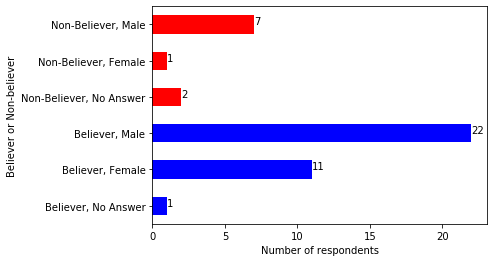

In [237]:
## Plot showing gender distribution among believers, non-believers and no answers

believers_nonbelievers.plot(kind="barh", color=['blue', 'blue', 'blue', 'red', 'red', 'red',])
for index, value in enumerate(believers_nonbelievers):
    plt.text(value, index, str(value))
plt.xlabel('Number of respondents')
plt.ylabel('Believer or Non-believer')

plt.yticks([0, 1, 2, 3, 4, 5], ['Believer, No Answer', 'Believer, Female', 'Believer, Male', 'Non-Believer, No Answer', 'Non-Believer, Female', 'Non-Believer, Male'])


# Create one more data visualization of your choosing -- anything you think is particularly interesting or significant..!

In [245]:
ccbeliefs2 = ccbeliefs_0

In [246]:
## respondents with solar installed
ccbeliefs2 = ccbeliefs2[ccbeliefs2['solar'] == 1]

In [247]:
## Income level among respondents with solar installation
ccbeliefs2_income_1 = ccbeliefs2[ccbeliefs2['income'] == 1]
ccbeliefs2_income_2 = ccbeliefs2[ccbeliefs2['income'] == 2]
ccbeliefs2_income_3 = ccbeliefs2[ccbeliefs2['income'] == 3]
ccbeliefs2_income_4 = ccbeliefs2[ccbeliefs2['income'] == 4]
ccbeliefs2_income_5 = ccbeliefs2[ccbeliefs2['income'] == 5]
ccbeliefs2_income_6 = ccbeliefs2[ccbeliefs2['income'] == 6]
ccbeliefs2_income_7 = ccbeliefs2[ccbeliefs2['income'] == 7]

In [261]:
## Scatter chart showing the distribution of solar respondents who are believers and non-believers, and their
## income level

trace1 = go.Scatter(
                    x = ccbeliefs2_income_1['climatechange_beliefs_score'],
                    y = ccbeliefs2_income_1['income'],
                    mode = "markers",
                    name = "<25k", 
                    marker = dict(size = 15, color = 'rgba(0, 125, 0, 0.5)'),
                    text= ccbeliefs2_income_1.income.value_counts())

trace2 = go.Scatter(
                    x = ccbeliefs2_income_2['climatechange_beliefs_score'],
                    y = ccbeliefs2_income_2['income'],
                    mode = "markers",
                    name = "25k to <50k", 
                    marker = dict(size = 15, color = 'rgba(0, 125, 0, 0.5)'),
                    text= ccbeliefs2_income_2.income.value_counts())

trace3 = go.Scatter(
                    x = ccbeliefs2_income_3['climatechange_beliefs_score'],
                    y = ccbeliefs2_income_3['income'],
                    mode = "markers",
                    name = "50k to <75k",
                    marker = dict(size = 15, color = 'rgba(255, 0, 0, 0.8)'),
                    text= ccbeliefs2_income_3.income.value_counts())
# Create trace2
trace4 = go.Scatter(
                    x = ccbeliefs2_income_4['climatechange_beliefs_score'],
                    y = ccbeliefs2_income_4['income'],
                    mode = "markers",
                    name = "75k to <100k",
                    marker = dict(size = 15, color = 'rgba(80, 26, 80, 0.8)'),
                    text= ccbeliefs2_income_4.income.value_counts())
# Create trace3
trace5 = go.Scatter(
                    x = ccbeliefs2_income_5['climatechange_beliefs_score'],
                    y = ccbeliefs2_income_5['income'],
                    mode = "markers",
                    name = "100k to <150k", 
                    marker = dict(size = 15, color = 'rgba(0, 60, 255, 0.5)'),
                    text= ccbeliefs2_income_5.income.value_counts())
trace6 = go.Scatter(
                    x = ccbeliefs2_income_6['climatechange_beliefs_score'],
                    y = ccbeliefs2_income_6['income'],
                    mode = "markers",
                    name = "150k to <200k", 
                    marker = dict(size = 15, color = 'rgba(200, 0, 200, 0.5)'),
                    text= ccbeliefs2_income_6.income.value_counts())

trace7 = go.Scatter(
                    x = ccbeliefs2_income_7['climatechange_beliefs_score'],
                    y = ccbeliefs2_income_7['income'],
                    mode = "markers",
                    name = ">200k", 
                    marker = dict(size = 15, color = 'rgba(0, 125, 0, 0.5)'),
                    text= ccbeliefs2_income_7.income.value_counts())

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7]

layout = dict(title = 'Income levels of people with solar installation and their climate change belief score ',
              xaxis= dict(range=[-11,10], title = 'climate change belief score: [-10 to -1] = Non-believer, [0 to 10] = believer',dtick = 1,zeroline= False),
              yaxis= dict(range=[0,8], title = 'income level',ticklen= 1,zeroline= False)
             )

fig = dict(data = data, layout = layout)
iplot(fig)

In [249]:
## respondents WITHOUT solar installation
ccbeliefs3 = ccbeliefs_0
ccbeliefs3 = ccbeliefs3[ccbeliefs3['solar'] == 0]

In [250]:
## Income level among respondents WITHOUT solar installation
ccbeliefs3_income_1 = ccbeliefs3[ccbeliefs3['income'] == 1]
ccbeliefs3_income_2 = ccbeliefs3[ccbeliefs3['income'] == 2]
ccbeliefs3_income_3 = ccbeliefs3[ccbeliefs3['income'] == 3]
ccbeliefs3_income_4 = ccbeliefs3[ccbeliefs3['income'] == 4]
ccbeliefs3_income_5 = ccbeliefs3[ccbeliefs3['income'] == 5]
ccbeliefs3_income_6 = ccbeliefs3[ccbeliefs3['income'] == 6]
ccbeliefs3_income_7 = ccbeliefs3[ccbeliefs3['income'] == 7]

In [258]:
## Scatter chart showing the distribution of NON solar respondents who are believers and non-believers, and their
## income level (future potential solar installatio n candidates)

trace1 = go.Scatter(
                    x = ccbeliefs3_income_1['climatechange_beliefs_score'],
                    y = ccbeliefs3_income_1['income'],
                    mode = "markers",
                    name = "<25k",
                    marker = dict(size = 15, color = 'rgba(255, 0, 0, 0.8)'),
                    text= ccbeliefs3_income_1.income)

trace2 = go.Scatter(
                    x = ccbeliefs3_income_2['climatechange_beliefs_score'],
                    y = ccbeliefs3_income_2['income'],
                    mode = "markers",
                    name = "25k to <50k",
                    marker = dict(size = 15, color = 'rgba(80, 26, 80, 0.8)'),
                    text= ccbeliefs3_income_2.income)

trace3 = go.Scatter(
                    x = ccbeliefs3_income_3['climatechange_beliefs_score'],
                    y = ccbeliefs3_income_3['income'],
                    mode = "markers",
                    name = "50k to <75k", 
                    marker = dict(size = 15, color = 'rgba(0, 60, 255, 0.5)'),
                    text= ccbeliefs3_income_3.income)
trace4 = go.Scatter(
                    x = ccbeliefs3_income_4['climatechange_beliefs_score'],
                    y = ccbeliefs3_income_4['income'],
                    mode = "markers",
                    name = "75k to <100k", 
                    marker = dict(size = 15, color = 'rgba(200, 0, 200, 0.5)'),
                    text= ccbeliefs3_income_4.income)

trace5 = go.Scatter(
                    x = ccbeliefs3_income_5['climatechange_beliefs_score'],
                    y = ccbeliefs3_income_5['income'],
                    mode = "markers",
                    name = "100k to <150k", 
                    marker = dict(size = 15, color = 'rgba(0, 125, 255, 0.5)'),
                    text= ccbeliefs3_income_5.income)

trace6 = go.Scatter(
                    x = ccbeliefs3_income_6['climatechange_beliefs_score'],
                    y = ccbeliefs3_income_6['income'],
                    mode = "markers",
                    name = "150k to <200k", 
                    marker = dict(size = 15, color = 'rgba(255, 125, 0, 0.5)'),
                    text= ccbeliefs3_income_6.income)
trace7 = go.Scatter(
                    x = ccbeliefs3_income_7['climatechange_beliefs_score'],
                    y = ccbeliefs3_income_7['income'],
                    mode = "markers",
                    name = ">200k", 
                    marker = dict(size = 15, color = 'rgba(0, 255, 0, 0.5)'),
                    text= ccbeliefs3_income_7.income)

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7]

layout = dict(title = 'Income levels of people without solar installation and potential marketing strategy ',
              xaxis= dict(range=[-11,11], title = 'Marketing strategy [-10 to -1] = Financial benefit, [0 to 10] = Environmental+Financial benefit',dtick = 1,zeroline= False),
              yaxis= dict(range=[0,8], title = 'income level',ticklen= 1,zeroline= False)
             )

fig = dict(data = data, layout = layout)
iplot(fig)